# INTRODUCTION



In [28]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


#### Import libraries and set options

In [29]:
import seaborn as sns
pd.set_option('display.width', 100)
pd.set_option('display.max_columns', 20)
sns.set_theme(color_codes=True, style='darkgrid', 
              palette='deep', font='sans-serif')

# IMPORT DATA AND DATA CLEANSING

In [30]:
    df_train = pd.read_csv('data/TrainingData.csv')
df_train.drop ('Id', axis = 1, inplace = True )
df_train.head().style.set_properties(**{'background-color':'black',
                                     'color': 'white'})

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [31]:
df_train.isnull().sum()

Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

###### There are no missing-values ​​in the training dataset.

In [32]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Income             252000 non-null  int64 
 1   Age                252000 non-null  int64 
 2   Experience         252000 non-null  int64 
 3   Married/Single     252000 non-null  object
 4   House_Ownership    252000 non-null  object
 5   Car_Ownership      252000 non-null  object
 6   Profession         252000 non-null  object
 7   CITY               252000 non-null  object
 8   STATE              252000 non-null  object
 9   CURRENT_JOB_YRS    252000 non-null  int64 
 10  CURRENT_HOUSE_YRS  252000 non-null  int64 
 11  Risk_Flag          252000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 23.1+ MB


In [33]:
# set target variable as category
df_train['Risk_Flag']=df_train['Risk_Flag'].astype('category')

# EDA

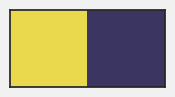

In [34]:
#Import ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots 
colors = ['#EAD94C','#3B3561']
sns.set(palette=colors, font='Serif', style='white', rc={'axes.facecolor':'#f1f1f1', 'figure.facecolor':'#f1f1f1'})
sns.palplot(colors)

In [35]:
df_train.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='tab10')

,count,mean,std,min,25%,50%,75%,max
Income,252000.000000,4997116.665325,2878311.013611,10310.000000,2503015.000000,5000694.500000,7477502.000000,9999938.000000
Age,252000.000000,49.954071,17.063855,21.000000,35.000000,50.000000,65.000000,79.000000
Experience,252000.000000,10.084437,6.002590,0.000000,5.000000,10.000000,15.000000,20.000000
CURRENT_JOB_YRS,252000.000000,6.333877,3.647053,0.000000,3.000000,6.000000,9.000000,14.000000
CURRENT_HOUSE_YRS,252000.000000,11.997794,1.399037,10.000000,11.000000,12.000000,13.000000,14.000000


/Users/pramithajayasooriya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/pramithajayasooriya/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


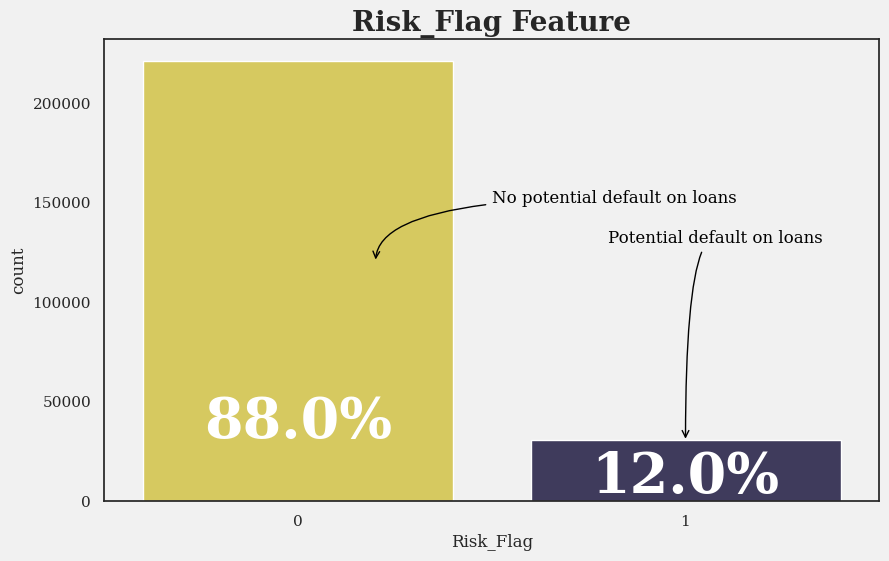

In [36]:
#Lets check the Target features first
fig = plt.figure(figsize=(10,6))
ax=sns.countplot(data=df_train, x='Risk_Flag')
for i in ax.patches:
    ax.text(x=i.get_x()+i.get_width()/2, y=i.get_height()/7, s=f"{np.round(i.get_height()/len(df_train)*100,0)}%", ha='center', size=40, weight='bold', rotation=360, color='white')
plt.title("Risk_Flag Feature", size=20, weight='bold')
plt.annotate(text="No potential default on loans", xytext=(0.5,150000),xy=(0.2,120000), arrowprops =dict(arrowstyle="->", color='black', connectionstyle="angle3,angleA=0,angleB=90"), color='black')
plt.annotate(text="Potential default on loans", xytext=(0.8,130000),xy=(1,30000), arrowprops =dict(arrowstyle="->", color='black',  connectionstyle="angle3,angleA=0,angleB=90"), color='black')
plt.show()

###### The classes are heavily skewed we need to solve this issue later, with algorithm SMOTE (Synthetic Minority Oversampling TEchnique).

###### Class 0 represents 88.00% of the dataset, while class 1 only 12.00%.

/Users/pramithajayasooriya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/pramithajayasooriya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/pramithajayasooriya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/pramithajayasooriya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

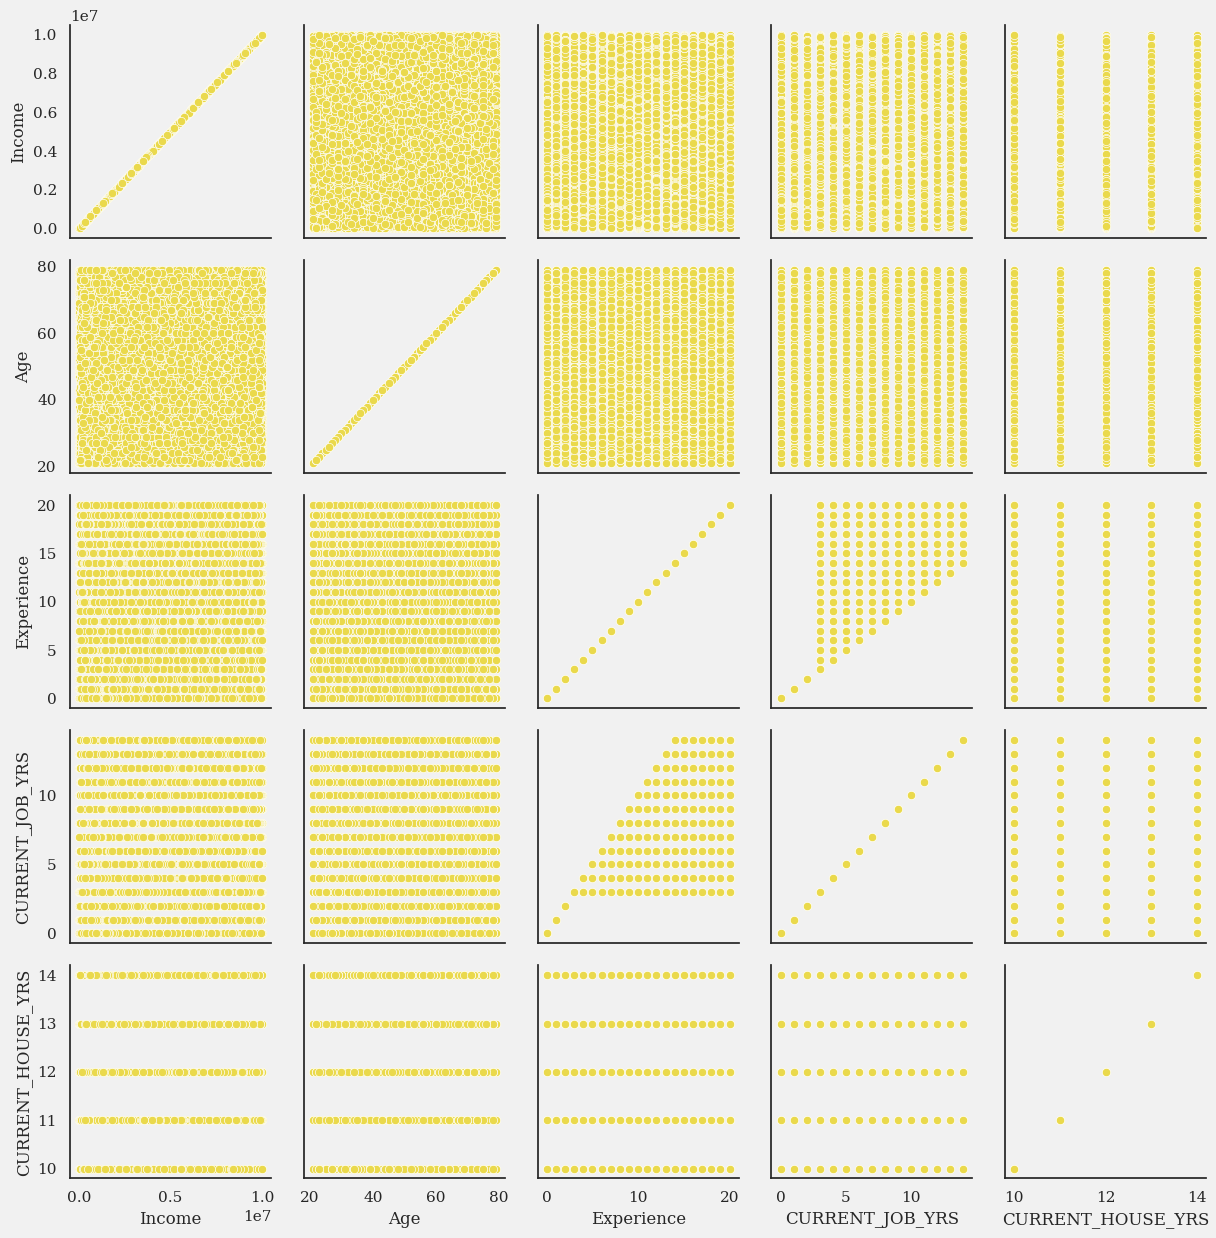

In [37]:
g = sns.PairGrid(df_train)
g.map(sns.scatterplot)
plt.show()

# PREPROCESSING

#### Management of binary categorical data

In [38]:
from sklearn.preprocessing import LabelEncoder

binary_class = ['Married/Single', 'Car_Ownership']
for column in binary_class:
    print ( '\nBefore:', df_train [column].unique () )
    lab_enc = LabelEncoder()
    df_train [column] = lab_enc.fit_transform ( df_train [column].values )
    print ('')
    print ( 'After:\n', df_train [column] )
    print ( '*' * 50 )

# rename column Single
df_train.rename(columns = { 'Married/Single' : 'Single' }, inplace = True)
df_train['Single']=df_train['Single'].astype('category')
df_train['Car_Ownership']=df_train['Car_Ownership'].astype('category')


Before: ['single' 'married']

After:
 0         1
1         1
2         0
3         1
4         1
         ..
251995    1
251996    1
251997    1
251998    1
251999    1
Name: Married/Single, Length: 252000, dtype: int64
**************************************************

Before: ['no' 'yes']

After:
 0         0
1         0
2         0
3         1
4         0
         ..
251995    0
251996    0
251997    0
251998    0
251999    0
Name: Car_Ownership, Length: 252000, dtype: int64
**************************************************


#### Management of categorical data

**One-Hot coding** for the other categorical columns, otherwise one of the most common mistakes would be made, i.e. the classification algorithm will assume that there is an order of magnitude between the various professions, states or cities.

In [39]:
one_hot_class = ['House_Ownership', 'CITY', 'STATE', 'Profession']
for column in one_hot_class:
    one_hot = pd.get_dummies ( df_train [column] ,
                drop_first = True)
    df_train = pd.concat([df_train, one_hot], axis=1)
    df_train.drop (column, axis = 1, inplace = True )
    
df_train.head().style.set_properties(**{'background-color':'black',
                                     'color': 'white'})

In [40]:
print ( df_train.info() )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Columns: 404 entries, Income to Web_designer
dtypes: bool(396), category(3), int64(5)
memory usage: 105.5 MB
None


#### Train and test split

In [41]:
from sklearn.model_selection import train_test_split
X, y = df_train.drop ('Risk_Flag', axis=1).values , df_train.Risk_Flag.values
X_train, X_test, y_train, y_test = train_test_split ( X, y,
                                                     test_size = 0.3,
                                                     random_state = 1,
                                                     stratify = y)

#### Minority class oversampling in the training dataset (SMOTE)

In [42]:
from imblearn.over_sampling import SMOTE

print ('Number of observations in the target variable before oversampling of the minority class:', np.bincount (y_train) )

smt = SMOTE ()
X_train, y_train = smt.fit_resample (X_train, y_train)

print ('\nNumber of observations in the target variable after oversampling of the minority class:', np.bincount (y_train) )

Number of observations in the target variable before oversampling of the minority class: [154703  21697]

Number of observations in the target variable after oversampling of the minority class: [154703 154703]


#### Standardization of variables

In [43]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_train_std = std_scaler.fit_transform ( X_train )
X_test_std = std_scaler.transform ( X_test )

# MODEL SELECTION AND EVALUATION OF PERFORMANCE

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier ( random_state = 1 )
tree.fit ( X_train_std, y_train )
y_pred = tree.predict ( X_test_std )
print ( 'Accuracy score: %.2f' %accuracy_score ( y_test, y_pred ) )
print ( 'Roc_Auc score: %.2f' %roc_auc_score ( y_test, y_pred ) )

Accuracy score: 0.88
Roc_Auc score: 0.85


In [45]:
from sklearn.model_selection import GridSearchCV
# range of parameter values
split_range = [ 8, 10 ]
# parameters grid
grid_param = [
    { 'criterion' : [ 'entropy' ],
     'splitter' : [ 'best', 'random' ],
     'min_samples_split' : split_range }
]
gs = GridSearchCV ( estimator = tree,
                   param_grid = grid_param,
                   scoring = 'roc_auc',
                   cv = 3,
                   refit = True,
                   n_jobs = 4
                   )

gs = gs.fit ( X_train, y_train )

print ( 'Best hyperparameter:', gs.best_params_ )

print ( 'Best score: %.3f' %gs.best_score_ )

gs = gs.best_estimator_

Best hyperparameter: {'criterion': 'entropy', 'min_samples_split': 10, 'splitter': 'random'}
Best score: 0.941


In [46]:
gs.fit ( X_train_std, y_train )
y_pred_gs = gs.predict ( X_test_std )
print ( 'Accuracy score: %.2f' %accuracy_score ( y_test, y_pred_gs ) )
print ( 'Roc_Auc score: %.2f' %roc_auc_score ( y_test, y_pred_gs ) )

Accuracy score: 0.88
Roc_Auc score: 0.85


Following model optimization:

- accuracy has improved (0,87 --> 0,88)

- the rac_auc score is fixed at 0.85.

Now let's see in detail what errors the model makes on the test data through the confusion matrix.

#### CONFUSION MATRIX

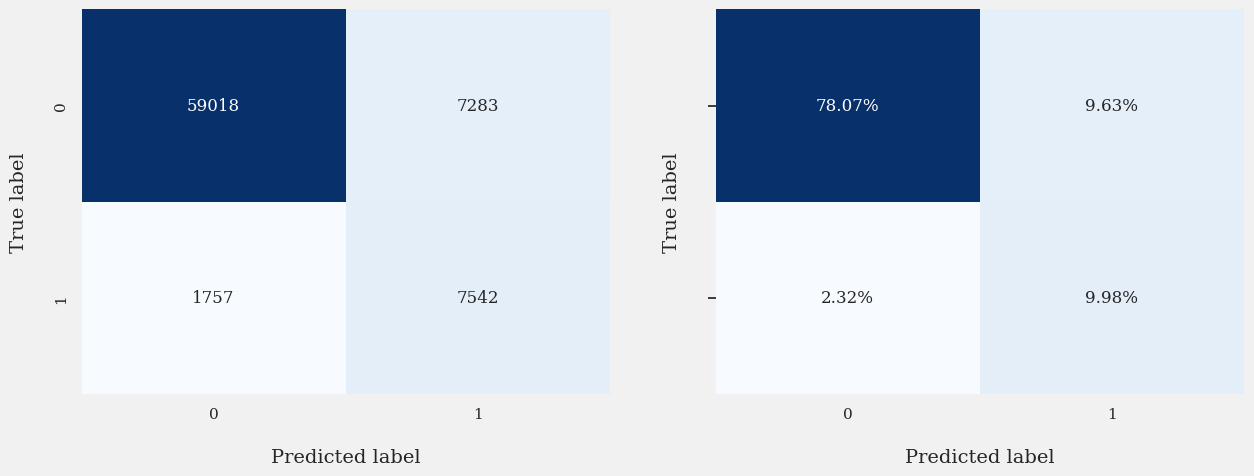

In [47]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix (  y_test, y_pred_gs )

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
#plot 1
sns.heatmap(conf_matrix,ax=axes[0],annot=True, cmap='Blues', cbar=False, fmt='d')
axes[0].set_xlabel('\nPredicted label', size = 14)
axes[0].set_ylabel('True label\n', size = 14)

# plot 2
sns.heatmap(conf_matrix/np.sum(conf_matrix),ax=axes[1], annot=True, 
            fmt='.2%', cmap='Blues', cbar=False)
axes[1].set_xlabel('\nPredicted label', size = 14)
axes[1].set_ylabel('True label\n', size = 14)
axes[1].yaxis.tick_left()
plt.show()

/Users/pramithajayasooriya/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pramithajayasooriya/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 459, in _score
    y_pred = method_caller(clf, "decision_function", X, pos_label=pos_label)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/pramithajayasooriya/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "/Users/pramithajayasooriya/anaconda3/lib/python3.11/site-packages/sklearn/utils/_response.py", line 73, in _get_response_values
    prediction_method = _check_response_method(estimator, response_method)
                        ^^^^^^^^^^^^^^^^^^^^

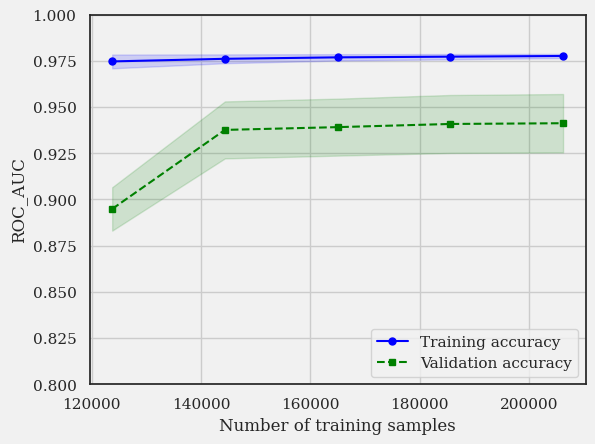

KeyboardInterrupt: 

In [48]:
# learning curve

from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve ( estimator = gs,
                                                         
                                                            X = X_train_std,
                                                            y = y_train,
                                                            train_sizes = np.linspace ( 0.1, 1.0, 10 ),
                                                            cv = 3,
                                                            scoring = 'roc_auc',
                                                            n_jobs = 4
                                                            )

train_mean = np.mean ( train_scores, axis = 1 )

train_std = np.std ( train_scores, axis = 1 )

test_mean = np.mean ( test_scores, axis = 1 )

test_std = np.std ( test_scores, axis = 1 )

plt.plot ( train_sizes, train_mean, color = 'blue', marker = 'o', markersize = 5, label = 'Training accuracy' )

plt.fill_between ( train_sizes, train_mean + train_std, train_mean - train_std, alpha = 0.15, color = 'blue' )

plt.plot ( train_sizes, test_mean, color = 'green', linestyle = '--', marker = 's', markersize = 5, label = 'Validation accuracy' )

plt.fill_between ( train_sizes, test_mean + test_std, test_mean - test_std, alpha = 0.15, color = 'green' )

plt.grid ()

plt.xlabel ( 'Number of training samples' )

plt.ylabel ( 'ROC_AUC' )

plt.legend ( loc = 'lower right' )

plt.ylim ( [0.8, 1.0] )

plt.show()

# validation curve

from sklearn.model_selection import validation_curve

param_range = [ 8, 10, 12, 14, 16, 18, 20 ]

train_scores, test_scores = validation_curve ( estimator = gs,
                                              
                                                X = X_train_std,
                                                y = y_train,
                                                param_name = 'min_samples_split',
                                                param_range = param_range,
                                                cv = 3,
                                                scoring = 'roc_auc',
                                                n_jobs = 4
                                                )

train_mean = np.mean ( train_scores, axis = 1 )

train_std = np.std ( train_scores, axis = 1 )

test_mean = np.mean ( test_scores, axis = 1 )

test_std = np.std ( test_scores, axis = 1 )

plt.plot ( param_range, train_mean, color = 'blue', marker = 'o', markersize = 5, label = 'Training accuracy' )

plt.fill_between ( param_range, train_mean + train_std, train_mean - train_std, alpha = 0.15, color = 'blue' )

plt.plot ( param_range, test_mean, color = 'green', linestyle = '--', marker = 's', markersize = 5, label = 'Validation accuracy' )

plt.fill_between ( param_range, test_mean + test_std, test_mean - test_std, alpha = 0.15, color = 'green' )

plt.grid ()

plt.xscale ( 'log' )

plt.xlabel ( 'Parameter min_samples_split' )

plt.ylabel ( 'ROC_AUC' )

plt.legend ( loc = 'lower right' )

plt.ylim ( [0.8, 1.0] )


plt.show()




From the confusion matrices it can be deduced that:

- the model fails 2.30% of the time to classify it as non-potential default

- in general, it is noted that it is more wrong to classify as potential defaulting those who in reality are not (9.88%)

# CONCLUSIONS AND FINAL CONSIDERATIONS

**Based on the requirements of the task in question, we can conclude that the trained tree model achieved a good roc_auc_score of 0.85.**

**For a more in-depth analysis it is advisable to test other classification algortms, perhaps more performing, or to test some ensemble algorithm.**

**I await comments and / or suggestions.**